In [1]:
# Customer Review Clothing Product Analysis

In [2]:
# Import Necessary Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

import math

rc = {
    "axes.facecolor": "#E6FFE6",
    "figure.facecolor": "#E6FFE6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [4]:
# Load the data

In [5]:
# read the data
url = "/kaggle/input/consumer-review-of-clothing-product/Consumer Review of Clothing Product/data_amazon.xlsx - Sheet1.csv"
df= pd.read_table(url, delimiter=",")


In [6]:
df = pd.read_table(url, delimiter=",")

In [7]:
df.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [8]:
df['Review']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
49333    Loved the color!!!  Dress fit great and I got ...
49334    This dress looked great and I loved the materi...
49335    Wanted this dress to work it didn't. It is ver...
49336    No complaints othe than the zipper gets stuck ...
49337    The fabric was really nice, I'm a L and it fit...
Name: Review, Length: 49338, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [10]:
# Missing Values Analysis

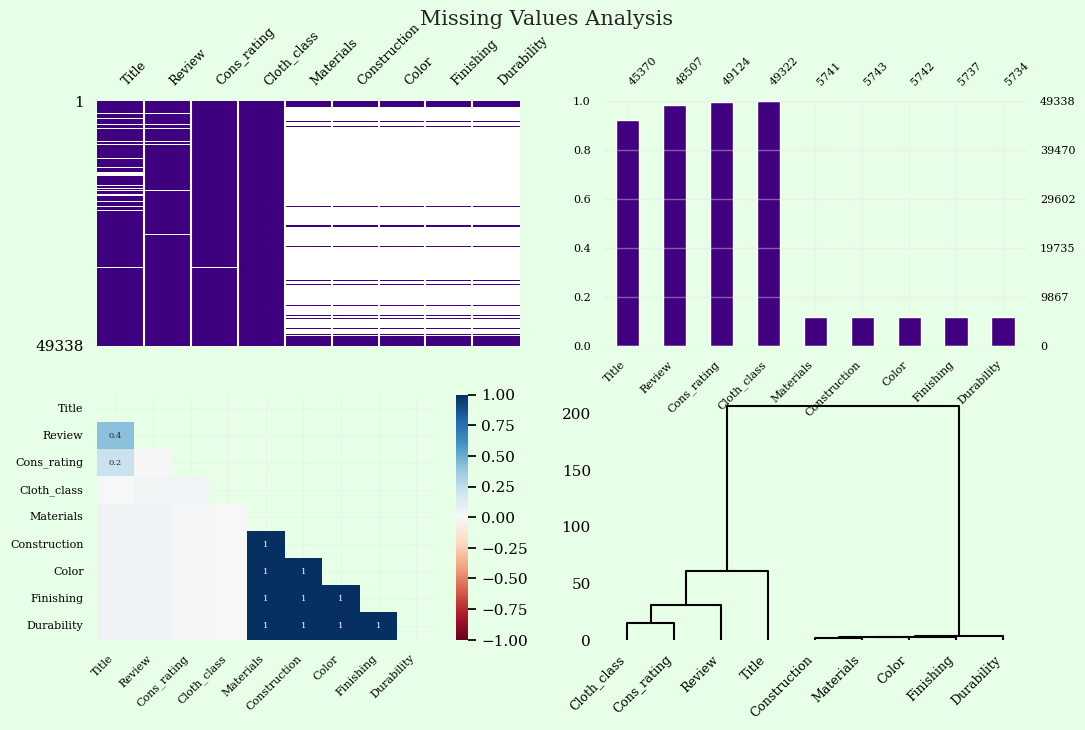

In [11]:
import missingno as msno

fig, ax = plt.subplots(2, 2, figsize=(12, 7))
axs = np.ravel(ax)
msno.matrix(df, fontsize=9, color=(0.25, 0, 0.5), ax=axs[0]);
msno.bar(df, fontsize=8, color=(0.25, 0, 0.5), ax=axs[1]);
msno.heatmap(df, fontsize=8, ax=axs[2]);
msno.dendrogram(df, fontsize=9, ax=axs[3], orientation='top')

fig.suptitle("Missing Values Analysis", y=1.01, fontsize=15)

# Save the plot
plt.savefig("missing_values_analysis.png")

# Show th plot
plt.show()



In [12]:
df.isnull().mean() * 100

Title            8.042482
Review           1.684300
Cons_rating      0.433743
Cloth_class      0.032429
Materials       88.363939
Construction    88.359885
Color           88.361912
Finishing       88.372046
Durability      88.378126
dtype: float64

In [13]:
df.fillna(0, inplace=True)

In [14]:
df.isnull().mean()*100

Title           0.0
Review          0.0
Cons_rating     0.0
Cloth_class     0.0
Materials       0.0
Construction    0.0
Color           0.0
Finishing       0.0
Durability      0.0
dtype: float64

In [15]:
df.duplicated().sum()

1121

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48217 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         48217 non-null  object 
 1   Review        48217 non-null  object 
 2   Cons_rating   48217 non-null  float64
 3   Cloth_class   48217 non-null  object 
 4   Materials     48217 non-null  float64
 5   Construction  48217 non-null  float64
 6   Color         48217 non-null  float64
 7   Finishing     48217 non-null  float64
 8   Durability    48217 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [19]:
# Descriptive Statistics

# Descriptive statistics provide a summary of the main characteristics of a dataset. This incldes measues like mean, median, standard deviation , minimum, maximum etc.
# The describe() function in pandas generates these summary statistics for numerical columns in the datasets

In [20]:
df.describe().style.background_gradient(cmap='tab20c')

,Cons_rating,Materials,Construction,Color,Finishing,Durability
count,48217.000000,48217.000000,48217.000000,48217.000000,48217.000000,48217.000000
mean,4.075036,0.036502,0.060041,0.030943,0.031628,0.025323
std,1.312634,0.191477,0.237653,0.177426,0.175009,0.161789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,9.000000,2.000000,9.000000,1.000000,9.000000


In [21]:
# Exploratory Data Analysis (EDA)

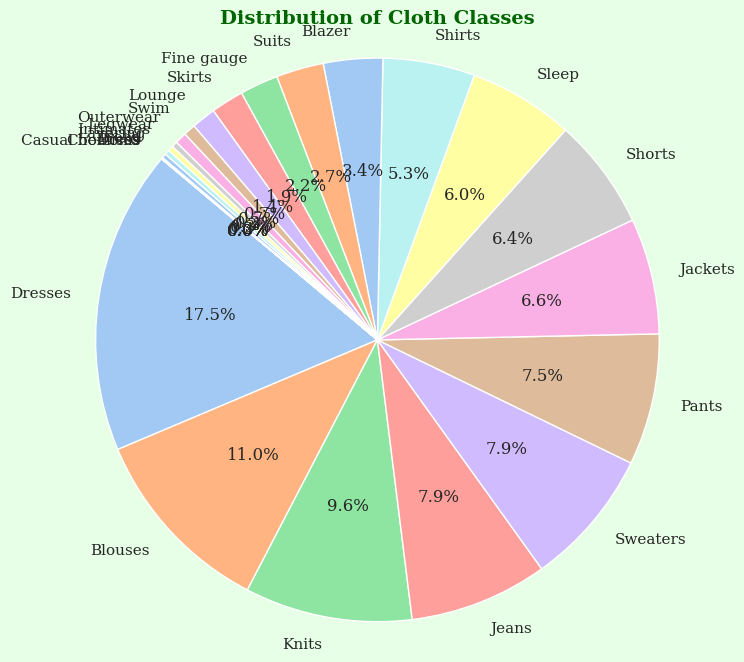

In [22]:
# Calculate the frequency of each cloth class
cloth_class_counts = df['Cloth_class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cloth_class_counts, labels=cloth_class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Cloth Classes', fontsize=14, fontweight='bold', color='darkgreen')
plt.axis('equal') 
plt.savefig('Distribution of Cloth Classes.png')
plt.show()

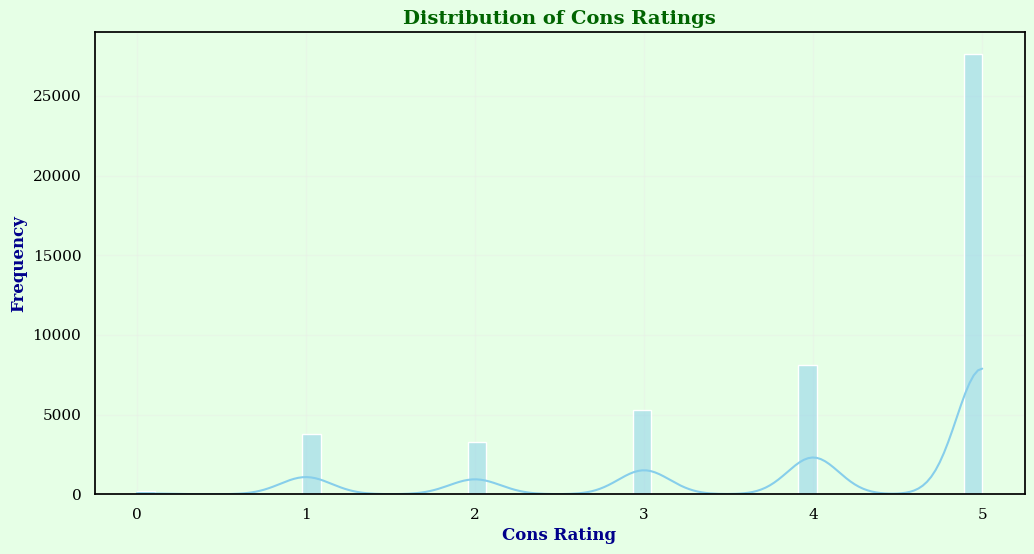

In [23]:
# Distribution of Cons Ratings

plt.figure(figsize=(12,6))
sns.histplot(df['Cons_rating'], kde=True, color='skyblue')
plt.title('Distribution of Cons Ratings', fontsize=14, fontweight = 'bold', color='darkgreen')
plt.xlabel('Cons Rating', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='darkblue')
plt.savefig('Distribution of Con Ratings.png')
plt.show()

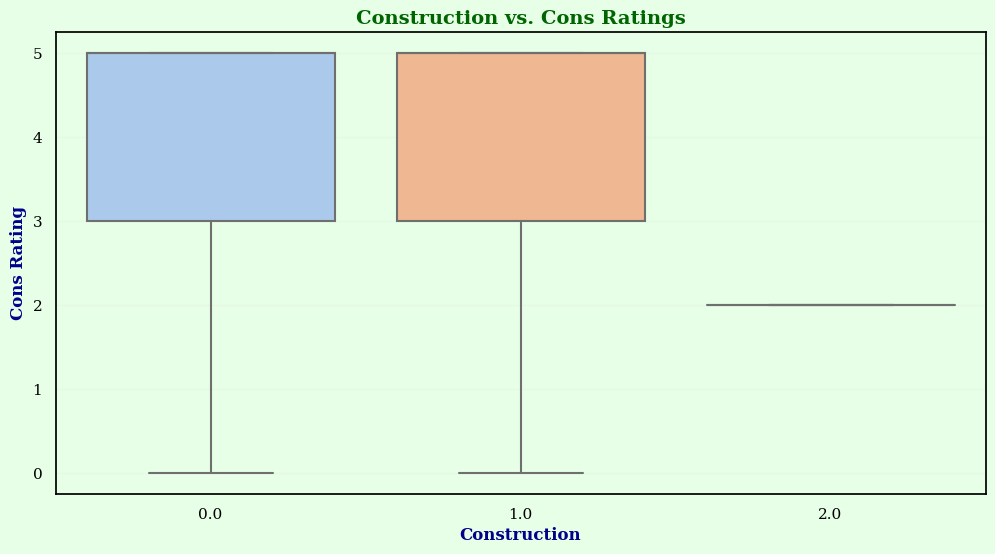

In [24]:
# Construction vs. Cons Ratings

plt.figure(figsize=(12, 6))
sns.boxplot(x='Construction', y='Cons_rating', data=df, palette='pastel')
plt.title('Construction vs. Cons Ratings', fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Construction', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Cons Rating', fontsize=12, fontweight='bold', color='darkblue')
plt.savefig('Construction vs. Cons Ratings.png')
plt.show()

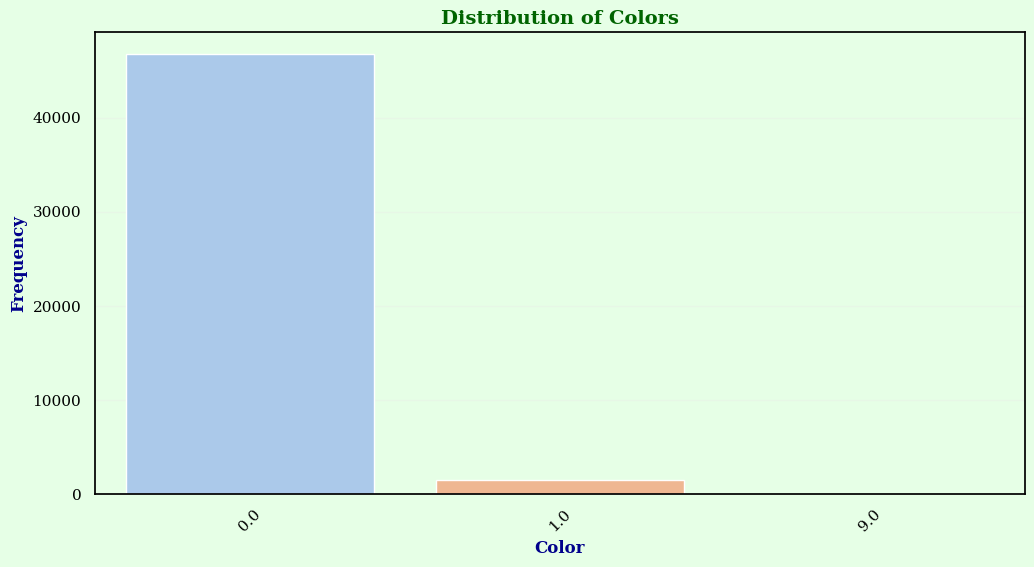

In [25]:
# Color Distribuiion 
plt.figure(figsize=(12, 6))
sns.countplot(x='Color', data=df, palette='pastel')
plt.title("Distribution of Colors", fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Color', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='darkblue')
plt.xticks(rotation=45)
plt.savefig("Distribuion of Colors.png")
plt.show()

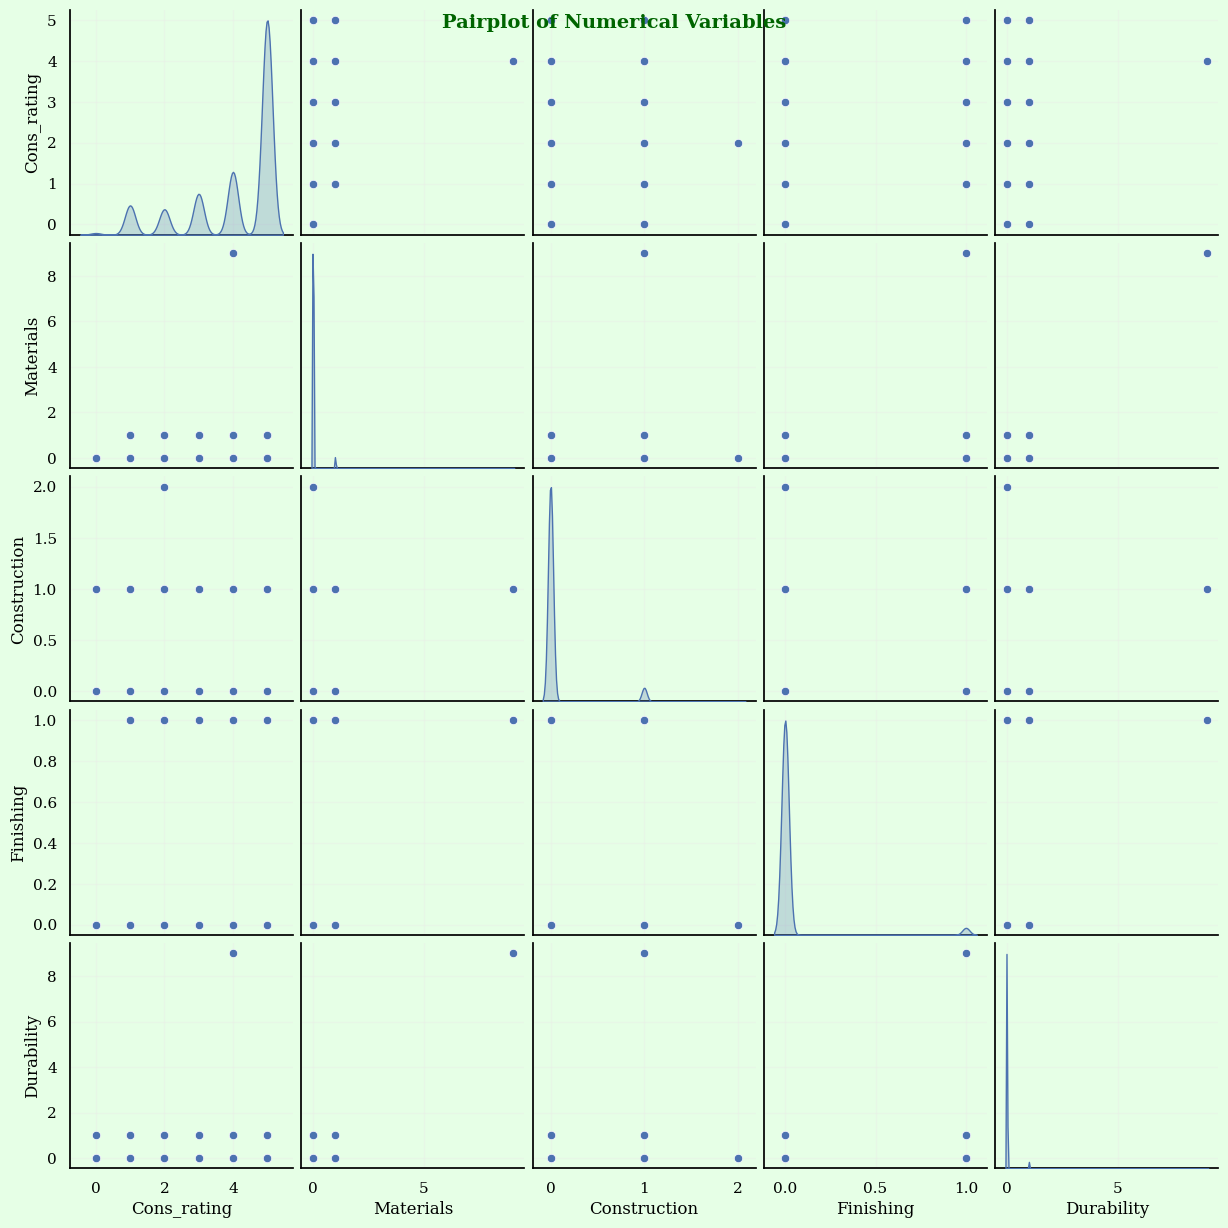

In [26]:
# Pairplot of Numerical Variables
sns.pairplot(df[['Cons_rating', 'Materials', 'Construction', 'Finishing', 'Durability']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', fontsize=14, fontweight='bold', color='darkgreen')
plt.savefig('Pairplot of Numerical Variables.png')
plt.show()

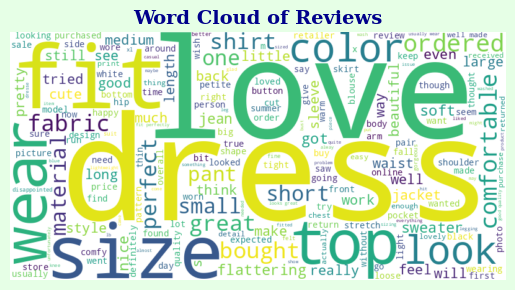

In [27]:
# Convert 'Review' column to string type

df['Review'] = df['Review'].astype(str)

# Word Cloud of Reviews
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews', fontsize=14, fontweight='bold', color='darkblue')
plt.axis('off')
plt.savefig('Word Cloud of Reviews.png')
plt.show()

In [28]:
# Sentiment Analysis

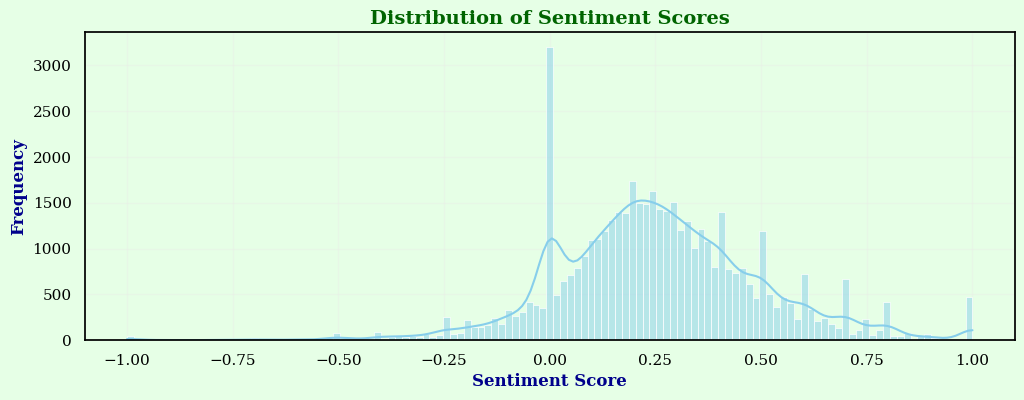

In [29]:
# Sentiment Analysis
# We'll use the TextBold library for sentiment analysis
from textblob import TextBlob
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting Sentiment Distributin
plt.figure(figsize=(12, 4))
sns.histplot(df['Sentiment'], kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores', fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Sentiment Score', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='darkblue')
plt.savefig('Distribuion of Sentiment Scores.png')
plt.show()

In [30]:
# Categorical Analysis
categorical_counts = df['Cloth_class'].value_counts()

print('/nCategorical Analysis:')
print(categorical_counts)

/nCategorical Analysis:
Cloth_class
Dresses           8422
Blouses           5309
Knits             4631
Jeans             3827
Sweaters          3808
Pants             3634
Jackets           3205
Shorts            3075
Sleep             2916
Shirts            2543
Blazer            1638
Suits             1313
Fine gauge        1062
Skirts             906
Lounge             672
Swim               332
Outerwear          321
Legwear            159
Intimates          150
Layering           135
Trend              119
Dress               22
0                   15
Casual bottoms       2
Chemises             1
Name: count, dtype: int64


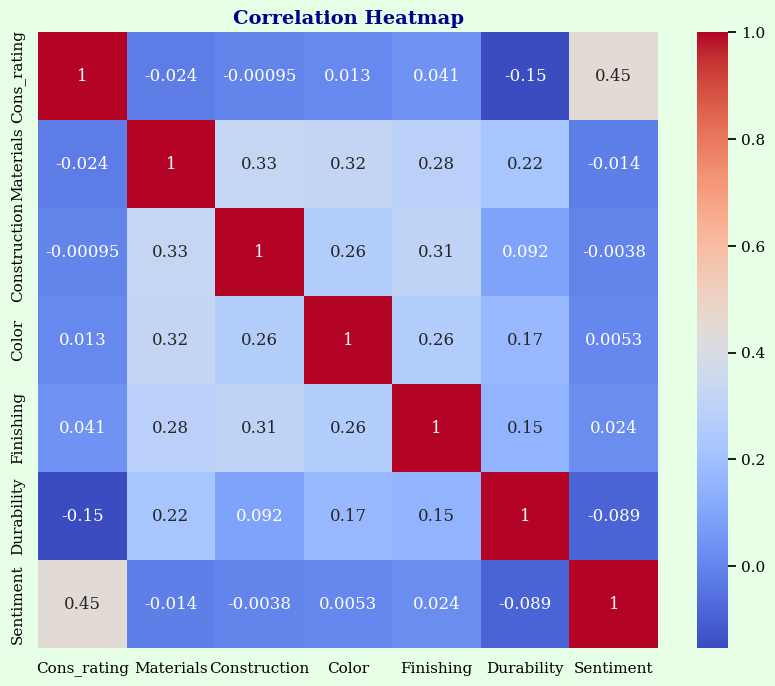

In [31]:
# Correlation Analysis

# Drop non-numeric columns

df_numeric = df.drop(columns=['Title', 'Review', 'Cloth_class'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation  matrix as heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold', color='darkblue')
plt.savefig('Correlation Heatmap.png')
plt.show()

In [32]:
# Feature Importance Analysis

In [33]:
# Feature Importance analysis identifies which variables have the most impact on the target variable in perdective modeling
# We use a Random Forest Regressor to estimate feature importance based on the trained model

In [34]:
X = df.drop(columns=['Cons_rating', 'Title', 'Review', 'Cloth_class'])
y = df['Cons_rating']
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
Sentiment       0.913070
Durability      0.024522
Construction    0.021127
Materials       0.014866
Color           0.013689
Finishing       0.012727
dtype: float64


In [35]:
# Clustering
# Clustering is a technique used to group similar data pints together. It helps in finding patterns and structrue in the data.We Use the K-Means clustering.

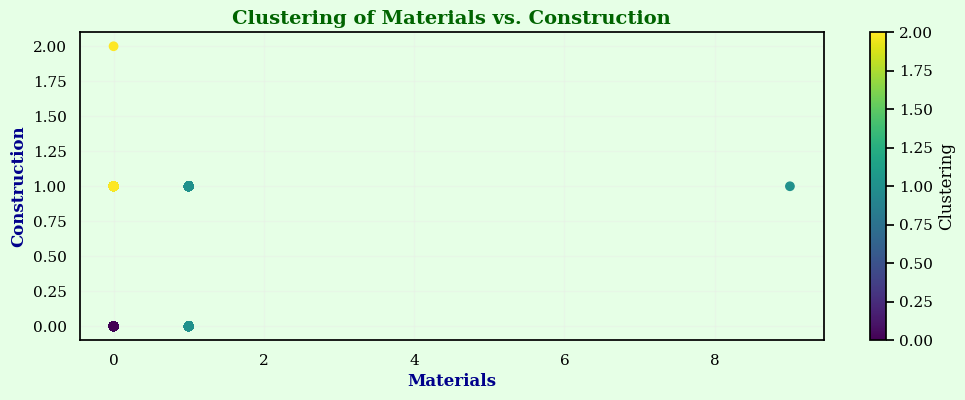

Cluster Counts:
Cluster
0    44368
2     2082
1     1767
Name: count, dtype: int64


In [36]:
from sklearn.cluster import KMeans
X_cluster = df[['Materials', 'Construction', 'Color', 'Finishing', 'Durability']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_cluster)
df['Cluster'] = kmeans.labels_

# Scatter plot with labels
plt.figure(figsize=(12, 4))
plt.scatter(X_cluster['Materials'], X_cluster['Construction'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Materials', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Construction', fontsize=12, fontweight='bold', color='darkblue')
plt.title('Clustering of Materials vs. Construction', fontsize=14, fontweight='bold', color='darkgreen')
plt.colorbar(label='Clustering')
plt.savefig('Clustering of Materials vs. Construction.png')
plt.show()

# print result values
cluster_counts = df['Cluster'].value_counts()
print('Cluster Counts:')
print(cluster_counts)

In [39]:
# NLP (Topic Modeling)
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_nlp = vectorizer.fit_transform(df['Review'])
lda = LatentDirichletAllocation(n_components=5, random_state=0)
topics = lda.fit_transform(X_nlp)

# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words = []

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words.append([feature_names[i] for i in top_words_idx])

# Print out the top words for each topic
for i, words in enumerate(top_words):
    print(f"Topic {i+1}:")
    print(", ".join(words))

Topic 1:
dress, size, small, like, just, love, fabric, fit, large, ordered
Topic 2:
color, sweater, good, jacket, like, great, shirt, quality, nice, fit
Topic 3:
fit, like, size, pants, just, waist, ordered, quality, don, good
Topic 4:
love, comfortable, dress, great, wear, jeans, perfect, soft, fit, flattering
Topic 5:
size, fit, perfect, fits, great, wear, perfectly, bought, long, comfortable


In [ ]:
# Build a Model and Prediction


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import classification_report , accuracy_score
y_pred = model.predict(X_test)

# Print classification report and accuracy 
print('Classification Report:')
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.34      0.27      0.30       758
         2.0       0.16      0.10      0.12       640
         3.0       0.15      0.09      0.11      1021
         4.0       0.23      0.14      0.17      1633
         5.0       0.65      0.82      0.73      5557

    accuracy                           0.53      9644
   macro avg       0.25      0.24      0.24      9644
weighted avg       0.47      0.53      0.49      9644

Accuracy: 53.41


In [ ]:
# Conclustion:

Overall, the model has an accuracy of 53.41% which means it correctly predictes the class for approximately 53.41 % of the samples. However, it's important to note that the performance can be further improved, especially for classes with low precision and recall. Fine-tuning the model hyperparameters or considering different algorithms may help enhance the performance.